In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import poisson,skellam

In [ ]:
# Import the data
epl_games = pd.read_csv('epl.csv')
epl_games.head(10)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BFECAHH,BFECAHA
0,E0,15/08/2025,20:00,Liverpool,Bournemouth,4,2,H,1,0,...,2.03,1.78,2.07,1.85,2.03,1.88,1.94,1.76,2.14,1.86
1,E0,16/08/2025,12:30,Aston Villa,Newcastle,0,0,D,0,0,...,2.05,1.80,2.02,1.89,2.06,1.80,1.95,1.74,2.14,1.86
2,E0,16/08/2025,15:00,Brighton,Fulham,1,1,D,0,0,...,1.83,2.03,1.93,2.00,1.84,2.03,1.80,1.96,1.91,2.08
3,E0,16/08/2025,15:00,Sunderland,West Ham,3,0,H,0,0,...,1.95,1.90,1.97,1.95,1.95,1.94,1.86,1.78,2.02,1.97
4,E0,16/08/2025,15:00,Tottenham,Burnley,3,0,H,1,0,...,1.98,1.88,1.99,1.93,1.98,1.91,1.88,1.83,2.07,1.92
5,E0,16/08/2025,17:30,Wolves,Man City,0,4,A,0,2,...,1.98,1.88,2.07,1.86,2.04,1.88,1.91,1.81,2.05,1.94
6,E0,17/08/2025,14:00,Chelsea,Crystal Palace,0,0,D,0,0,...,1.85,2.00,1.74,2.21,1.85,2.03,1.79,1.97,1.88,2.12
7,E0,17/08/2025,14:00,Nott'm Forest,Brentford,3,1,H,3,0,...,1.88,1.98,2.18,1.76,1.91,1.98,1.86,1.89,1.96,2.03
8,E0,17/08/2025,16:30,Man United,Arsenal,0,1,A,0,1,...,1.88,1.98,1.91,2.01,1.93,1.98,1.86,1.89,2.00,1.99
9,E0,18/08/2025,20:00,Leeds,Everton,1,0,H,0,0,...,2.05,1.80,2.02,1.90,2.05,1.86,1.91,1.78,2.14,1.86


In [ ]:
# define Big 6 teams
big6 = ["Arsenal", "Chelsea", "Liverpool",
        "Man United", "Man City", "Tottenham"]

# Add is_big6 to the dataset
epl_games['is_big6'] = epl_games.apply(
    lambda row: int(row['HomeTeam'] in big6 and row['AwayTeam'] in big6),
    axis=1
)

In [ ]:
# Select columns for renaming and analysis
pl = epl_games[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'is_big6']]
pleague = pl.rename(columns={'FTHG': 'home_goals',
                             'FTAG': 'away_goals'})


In [ ]:
home_team_data = pleague[['HomeTeam', 'AwayTeam', 'home_goals', 'is_big6']] \
    .assign(home=1) \
    .rename(columns={'HomeTeam': 'team',
                     'AwayTeam': 'opponent',
                     'home_goals': 'goals'})

away_team_data = pleague[['AwayTeam', 'HomeTeam', 'away_goals', 'is_big6']] \
    .assign(home=0) \
    .rename(columns={'AwayTeam': 'team',
                     'HomeTeam': 'opponent',
                     'away_goals': 'goals'})

In [ ]:
pleague = pleague[:-10]

In [ ]:
pleague.head(20)

,HomeTeam,AwayTeam,home_goals,away_goals,is_big6
0,Liverpool,Bournemouth,4,2,0
1,Aston Villa,Newcastle,0,0,0
2,Brighton,Fulham,1,1,0
3,Sunderland,West Ham,3,0,0
4,Tottenham,Burnley,3,0,0
5,Wolves,Man City,0,4,0
6,Chelsea,Crystal Palace,0,0,0
7,Nott'm Forest,Brentford,3,1,0
8,Man United,Arsenal,0,1,1
9,Leeds,Everton,1,0,0


In [ ]:
# Check the datatype of the chosen columns
print("DataFrame columns:", pleague.columns.tolist())
print("DataFrame shape:", pleague.shape)
print("Data types:")
print(pleague.dtypes)
print("\nFirst few rows:")
pleague.head()

DataFrame columns: ['HomeTeam', 'AwayTeam', 'home_goals', 'away_goals', 'is_big6']
DataFrame shape: (110, 5)
Data types:
HomeTeam      object
AwayTeam      object
home_goals     int64
away_goals     int64
is_big6        int64
dtype: object

First few rows:


,HomeTeam,AwayTeam,home_goals,away_goals,is_big6
0,Liverpool,Bournemouth,4,2,0
1,Aston Villa,Newcastle,0,0,0
2,Brighton,Fulham,1,1,0
3,Sunderland,West Ham,3,0,0
4,Tottenham,Burnley,3,0,0


/tmp/ipython-input-2123508976.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  poisson_pred = np.column_stack([[poisson.pmf(i, pleague[['home_goals', 'away_goals']].mean()[j]) for i in range(8)] for j in range(2)])
/tmp/ipython-input-2123508976.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  poisson_pred = np.column_stack([[poisson.pmf(i, pleague[['home_goals', 'away_goals']].mean()[j]) for i in range(8)] for j in range(2)])
/tmp/ipython-input-2123508976.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consiste

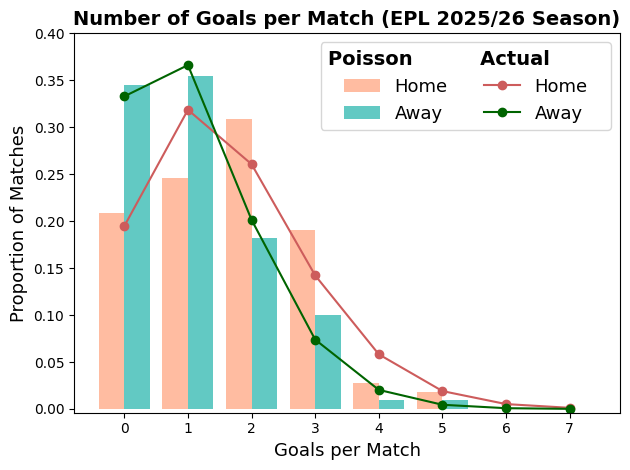

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

poisson_pred = np.column_stack([[poisson.pmf(i, pleague[['home_goals', 'away_goals']].mean()[j]) for i in range(8)] for j in range(2)])

# plot histogram of actual goals
plt.hist(pleague[['home_goals', 'away_goals']].values, range(9),
         alpha=0.7, label=['Home', 'Away'], density=True, color=["#FFA07A", "#20B2AA"])

# add lines for the Poisson distributions
pois1, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,0],
                  linestyle='-', marker='o',label="Home", color = '#CD5C5C')
pois2, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,1],
                  linestyle='-', marker='o',label="Away", color = '#006400')

leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
leg.set_title("Poisson          Actual        ", prop = {'size':'14', 'weight':'bold'})

plt.xticks([i-0.5 for i in range(1,9)],[i for i in range(8)])
plt.xlabel("Goals per Match",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Number of Goals per Match (EPL 2025/26 Season)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.4])
plt.tight_layout()
plt.show()

In [ ]:
# Probability of draw between home and away team
from scipy.stats import skellam

lambda_home = pleague["home_goals"].mean()
lambda_away = pleague["away_goals"].mean()

draw_prob = skellam.pmf(0, lambda_home, lambda_away)
draw_prob

np.float64(0.2457171631719868)

In [ ]:
# Probability of home team winning
lambda_home = pleague["home_goals"].mean()
lambda_away = pleague["away_goals"].mean()

win_prob = skellam.pmf(1, lambda_home, lambda_away)
win_prob

np.float64(0.2348243043808431)

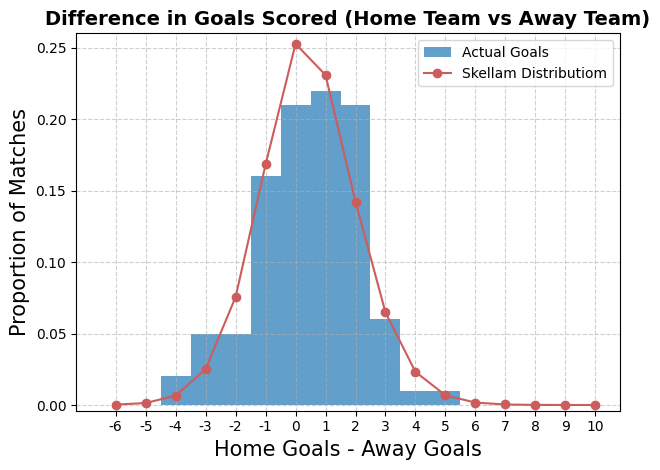

In [ ]:
# Get λ_home and λ_away from pleague
lambda_home = pleague["home_goals"].mean()   # or pleague["FTHG"].mean()
lambda_away = pleague["away_goals"].mean()   # or pleague["FTAG"].mean()

# Skellam PMF for goal differences from -6 to +10
skellam_pred = [skellam.pmf(i, lambda_home, lambda_away) for i in range(-6, 11)]

# Actual goal differences from pleague
goal_diff = pleague["home_goals"].values - pleague["away_goals"].values

# Plot histogram of actual differences
plt.hist(goal_diff,
         bins=range(-6, 11),     # +1 on upper bound for bins
         alpha=0.7,
         label="Actual Goals",
         density=True)          # replaces normed=True

# Plot Skellam prediction
xs = [i + 0.5 for i in range(-6, 11)]
plt.plot(xs, skellam_pred,
         linestyle='-',
         marker='o',
         label="Skellam Distributiom",
         color='#CD5C5C')

plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(xs, [i for i in range(-6, 11)])
plt.xlabel("Home Goals - Away Goals", size=15)
plt.ylabel("Proportion of Matches", size=15)
plt.title("Difference in Goals Scored (Home Team vs Away Team)",
          size=14, fontweight='bold')
plt.ylim([-0.004, 0.26])
plt.tight_layout()
plt.show()


# Building a Model

In [ ]:
# home side data
home_data = (
    pleague[['HomeTeam', 'AwayTeam', 'home_goals', 'is_big6']]
    .assign(home=1)
    .rename(columns={
        'HomeTeam': 'team',
        'AwayTeam': 'opponent',
        'home_goals': 'goals'
    })
)

# Away side data
away_data = (
    pleague[['AwayTeam', 'HomeTeam', 'away_goals', 'is_big6']]
    .assign(home=0)
    .rename(columns={
        'AwayTeam': 'team',
        'HomeTeam': 'opponent',
        'away_goals': 'goals'
    })
)

# Combine into one modelling DataFrame
goal_model_data = pd.concat([home_data, away_data], ignore_index=True)

# Fit Poisson model with big6 + home + team + opponent
poisson_model = smf.glm(
    formula="goals ~ home + is_big6 + team + opponent",
    data=goal_model_data,
    family=sm.families.Poisson()
).fit()

poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  220
Model:                            GLM   Df Residuals:                      179
Model Family:                 Poisson   Df Model:                           40
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -290.10
Date:                Sat, 29 Nov 2025   Deviance:                       187.83
Time:                        16:55:10   Pearson chi2:                     157.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2945
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.5897      0.531     -1.109      0.267      -1.631       0.452
team[T.Aston Villa]           -0.3794      0.369     -1.027      0.304      -1.103       0.345
team[T.Bournemouth]           -0.1797      0.341     -0.526      0.599      -0.849       0.489
team[T.Brentford]             -0.1386      0.345     -0.402      0.688      -0.815       0.538
team[T.Brighton]              -0.1470      0.346     -0.425      0.671      -0.824       0.531
team[T.Burnley]               -0.3778      0.360     -1.049      0.294      -1.084       0.328
team[T.Chelsea]                0.0346      0.322      0.108      0.914      -0.596       0.665
team[T.Crystal Palace]        -0.3765      0.363     -1.038      0.299      -1.088       0.335
team[T.Everton]               -0.5253      0.375     -1.401      0.161      -1.260       0.210
team[T.Fulham]                -0.5457      0.382     -1.429      0.153      -1.294       0.203
team[T.Leeds]                 -0.7684      0.397     -1.937      0.053      -1.546       0.009
team[T.Liverpool]              0.1486      0.343      0.433      0.665      -0.524       0.821
team[T.Man City]               0.2015      0.325      0.619      0.536      -0.436       0.839
team[T.Man United]             0.1868      0.334      0.559      0.576      -0.468       0.842
team[T.Newcastle]             -0.7083      0.385     -1.840      0.066      -1.463       0.046
team[T.Nott'm Forest]         -0.7765      0.397     -1.956      0.050      -1.555       0.002
team[T.Sunderland]            -0.4305      0.361     -1.191      0.234      -1.139       0.278
team[T.Tottenham]             -0.1169      0.332     -0.352      0.725      -0.767       0.533
team[T.West Ham]              -0.3763      0.368     -1.022      0.307      -1.098       0.345
team[T.Wolves]                -1.0125      0.449     -2.255      0.024      -1.892      -0.133
opponent[T.Aston Villa]        0.5277      0.561      0.940      0.347      -0.573       1.628
opponent[T.Bournemouth]        1.1489      0.524      2.194      0.028       0.123       2.175
opponent[T.Brentford]          1.0892      0.523      2.081      0.037       0.063       2.115
opponent[T.Brighton]           0.9365      0.536      1.748      0.080      -0.113       1.986
opponent[T.Burnley]            1.2663      0.516      2.456      0.014       0.256       2.277
opponent[T.Chelsea]            0.7930      0.544      1.457      0.145      -0.274       1.860
opponent[T.Crystal Palace]     0.4135      0.574      0.720      0.472      -0.712       1.539
opponent[T.Everton]            0.8439      0.542      1.556      0.120      -0.219       1.907
opponent[T.Fulham]             1.0069      0.532      1.893      0.058      -0.036       2.050
opponent[T.Leeds]              1.3530      

In [ ]:
big6 = ["Arsenal", "Chelsea", "Liverpool", "Man United", "Man City", "Tottenham"]

test_row = pd.DataFrame(
    data={
        'team': ['Chelsea'],
        'opponent': ['Arsenal'],
        'home': [1],
        'is_big6': [int('Chelsea' in big6 and 'Arsenal' in big6)]
    }
)

poisson_model.predict(test_row)


,0
0,0.569672


In [ ]:
big6 = ["Arsenal", "Chelsea", "Liverpool", "Man United", "Man City", "Tottenham"]

test_row_away = pd.DataFrame(
    data={
        'team': ['Arsenal'],
        'opponent': ['Chelsea'],
        'home': [0],
        'is_big6': [int('Arsenal' in big6 and 'Chelsea' in big6)]
    }
)

poisson_model.predict(test_row_away)


,0
0,0.824752


In [ ]:
import numpy as np
from scipy.stats import poisson

big6 = ["Arsenal", "Chelsea", "Liverpool", "Man United", "Man City", "Tottenham"]

def simulate_match(foot_model, homeTeam, awayTeam, max_goals=5):
    # Big 6 flag for this fixture
    is_big6_flag = int(homeTeam in big6 and awayTeam in big6)

    # Expected home goals (λ_home)
    home_row = pd.DataFrame({
        'team':   [homeTeam],
        'opponent': [awayTeam],
        'home':  [1],
        'is_big6': [is_big6_flag]
    })
    lambda_home = foot_model.predict(home_row).values[0]

    # Expected away goals (λ_away)
    away_row = pd.DataFrame({
        'team':   [awayTeam],
        'opponent': [homeTeam],
        'home':  [0],
        'is_big6': [is_big6_flag]
    })
    lambda_away = foot_model.predict(away_row).values[0]

    # Poisson goal distributions
    home_probs = [poisson.pmf(i, lambda_home) for i in range(max_goals + 1)]
    away_probs = [poisson.pmf(j, lambda_away) for j in range(max_goals + 1)]

    # Scoreline matrix P(Home=i, Away=j)
    matrix = np.outer(home_probs, away_probs)

    return matrix, lambda_home, lambda_away


In [ ]:
simulate_match(poisson_model, 'Chelsea', 'Arsenal', max_goals=4)

(array([[3.04085394e-01, 2.50402574e-01, 1.03098423e-01, 2.82991894e-02,
         5.82582229e-03],
        [1.11594885e-01, 9.18940763e-02, 3.78356108e-02, 1.03853879e-02,
         2.13799143e-03],
        [2.04768439e-02, 1.68618899e-02, 6.94255744e-03, 1.90564261e-03,
         3.92305767e-04],
        [2.50490058e-03, 2.06268885e-03, 8.49272291e-04, 2.33114307e-04,
         4.79901565e-05],
        [2.29815454e-04, 1.89244148e-04, 7.79176223e-05, 2.13873839e-05,
         4.40292110e-06]]),
 np.float64(0.3669853502642349),
 np.float64(0.8234613664300615))

## Chelsea vs Arsenal Results

In [ ]:
chel_ars_matrix, lambda_chelsea, lambda_arsenal = simulate_match(
    poisson_model, "Chelsea", "Arsenal", max_goals=10
)

chelsea_win_prob = np.sum(np.tril(chel_ars_matrix, -1))
chelsea_win_prob


np.float64(0.1549096936911574)

In [ ]:
arsenal_win_prob = np.sum(np.triu(chel_ars_matrix, 1))
arsenal_win_prob


np.float64(0.4419307066194453)

In [ ]:
draw_prob = np.sum(np.diag(chel_ars_matrix))
draw_prob


np.float64(0.4031595982959767)

In [ ]:
# Find index of maximum probability in the matrix
flat_index = np.argmax(chel_ars_matrix)
n_cols = chel_ars_matrix.shape[1]

home_goals_most, away_goals_most = divmod(flat_index, n_cols)
most_likely_score_prob = chel_ars_matrix[home_goals_most, away_goals_most]

print(f"Most likely scoreline: Chelsea {home_goals_most}–{away_goals_most} Arsenal")
print(f"Probability of that exact scoreline: {most_likely_score_prob:.3f}")


Most likely scoreline: Chelsea 0–0 Arsenal
Probability of that exact scoreline: 0.304


## West Ham vs Liverpool Results

In [ ]:
simulate_match(poisson_model, 'West Ham', 'Liverpool', max_goals=4)

(array([[0.0084805 , 0.02722759, 0.04370862, 0.04677715, 0.03754583],
        [0.01322426, 0.04245799, 0.06815807, 0.07294306, 0.05854797],
        [0.01031078, 0.03310393, 0.05314195, 0.05687274, 0.04564908],
        [0.00535946, 0.01720713, 0.02762272, 0.02956195, 0.02372799],
        [0.00208935, 0.00670809, 0.01076854, 0.01152453, 0.0092502 ]]),
 np.float64(1.5593736478165443),
 np.float64(3.2106125487961164))

In [ ]:
wes_liv_matrix, lambda_west_ham, lambda_liverpool = simulate_match(
    poisson_model, "West Ham", "Liverpool", max_goals=10
)

west_ham_win_prob = np.sum(np.tril(wes_liv_matrix, -1))
west_ham_win_prob

np.float64(0.1553598754605105)

In [ ]:
wes_liv = np.sum(np.triu(wes_liv_matrix, 1))
wes_liv

np.float64(0.6990973926756868)

In [ ]:
draw_prob = np.sum(np.diag(wes_liv_matrix))
draw_prob

np.float64(0.14503118899851244)

In [ ]:
# Find index of maximum probability in the matrix
flat_index = np.argmax(wes_liv_matrix)
n_cols = wes_liv_matrix.shape[1]

home_goals_most, away_goals_most = divmod(flat_index, n_cols)
most_likely_score_prob = wes_liv_matrix[home_goals_most, away_goals_most]

print(f"Most likely scoreline: West Ham {home_goals_most}–{away_goals_most} Liverpool")
print(f"Probability of that exact scoreline: {most_likely_score_prob:.3f}")


Most likely scoreline: West Ham 1–3 Liverpool
Probability of that exact scoreline: 0.073


## Crystal Palace Vs Man United Results

In [ ]:
simulate_match(poisson_model, 'Crystal Palace', 'Man United', max_goals=4)

(array([[0.03621285, 0.04090616, 0.02310386, 0.0086994 , 0.00245672],
        [0.07926045, 0.08953286, 0.0505683 , 0.01904071, 0.00537711],
        [0.08674017, 0.09798198, 0.05534038, 0.02083756, 0.00588454],
        [0.06328383, 0.07148562, 0.0403752 , 0.01520265, 0.00429324],
        [0.03462793, 0.03911582, 0.02209268, 0.00831865, 0.00234919]]),
 np.float64(2.1887379131487656),
 np.float64(1.129603220764942))

In [ ]:
cry_man_matrix, lambda_crystal_palace, lambda_man_utd = simulate_match(
    poisson_model, "Crystal Palace", "Man United", max_goals=10
)

Crystal_Palace_win_prob = np.sum(np.tril(cry_man_matrix, -1))
Crystal_Palace_win_prob

np.float64(0.6142431853640309)

In [ ]:
cry_man = np.sum(np.triu(cry_man_matrix, 1))
cry_man

np.float64(0.18685083278031955)

In [ ]:
draw_prob = np.sum(np.diag(cry_man_matrix))
draw_prob

np.float64(0.19888705386053251)

In [ ]:
# Find index of maximum probability in the matrix
flat_index = np.argmax(cry_man_matrix)
n_cols = cry_man_matrix.shape[1]

home_goals_most, away_goals_most = divmod(flat_index, n_cols)
most_likely_score_prob = cry_man_matrix[home_goals_most, away_goals_most]

print(f"Most likely scoreline: Crystal Palace {home_goals_most}–{away_goals_most} Man United")
print(f"Probability of that exact scoreline: {most_likely_score_prob:.3f}")


Most likely scoreline: Crystal Palace 1–0 Man United
Probability of that exact scoreline: 0.137


# Everton Vs Newcastle

In [ ]:
simulate_match(poisson_model, 'Everton', 'Newcastle', max_goals=4)

(array([[1.85322617e-01, 1.28973441e-01, 4.48788948e-02, 1.04110075e-02,
         1.81135941e-03],
        [1.83416944e-01, 1.27647206e-01, 4.44174049e-02, 1.03039511e-02,
         1.79273319e-03],
        [9.07654332e-02, 6.31673048e-02, 2.19803303e-02, 5.09899776e-03,
         8.87149255e-04],
        [2.99440306e-02, 2.08392517e-02, 7.25143548e-03, 1.68218825e-03,
         2.92675565e-04],
        [7.40902900e-03, 5.15624040e-03, 1.79421723e-03, 4.16222575e-04,
         7.24164952e-05]]),
 np.float64(0.9897169953714743),
 np.float64(0.6959401017133003))

In [ ]:
eve_new_matrix, lambda_everton, lambda_newcastle = simulate_match(
    poisson_model, "Everton", "Newcastle", max_goals=10
)

Everton_win_prob = np.sum(np.tril(eve_new_matrix, -1))
Everton_win_prob

np.float64(0.4136624479812915)

In [ ]:
eve_new = np.sum(np.triu(eve_new_matrix, 1))
eve_new

np.float64(0.2496307504115323)

In [ ]:
draw_prob = np.sum(np.diag(eve_new_matrix))
draw_prob

np.float64(0.3367067923090459)

In [ ]:
# Find index of maximum probability in the matrix
flat_index = np.argmax(eve_new_matrix)
n_cols = eve_new_matrix.shape[1]

home_goals_most, away_goals_most = divmod(flat_index, n_cols)
most_likely_score_prob = eve_new_matrix[home_goals_most, away_goals_most]

print(f"Most likely scoreline: Everton {home_goals_most}–{away_goals_most} Newcastle")
print(f"Probability of that exact scoreline: {most_likely_score_prob:.3f}")

Most likely scoreline: Everton 0–0 Newcastle
Probability of that exact scoreline: 0.185


# Tottenham vs Fulham

In [ ]:
spurs_ful_matrix, lambda_tottenham, lambda_fulham = simulate_match(
    poisson_model, "Tottenham", "Fulham", max_goals=10
)

Tottenham_win_prob = np.sum(np.tril(spurs_ful_matrix, -1))
Tottenham_win_prob

np.float64(0.6643411174855294)

In [ ]:
spurs_ful = np.sum(np.triu(spurs_ful_matrix, 1))
spurs_ful

np.float64(0.12211742775882668)

In [ ]:
draw_prob = np.sum(np.diag(spurs_ful_matrix))
draw_prob

np.float64(0.21353725464497067)

In [ ]:
# Find index of maximum probability in the matrix
flat_index = np.argmax(spurs_ful_matrix)
n_cols = spurs_ful_matrix.shape[1]

home_goals_most, away_goals_most = divmod(flat_index, n_cols)
most_likely_score_prob = spurs_ful_matrix[home_goals_most, away_goals_most]

print(f"Most likely scoreline: Tottenham {home_goals_most}–{away_goals_most} Fulham")
print(f"Probability of that exact scoreline: {most_likely_score_prob:.3f}")

Most likely scoreline: Tottenham 1–0 Fulham
Probability of that exact scoreline: 0.152


# Manchester City vs Leed Utd

In [ ]:
man_leeds_matrix, lambda_man_city, lambda_leeds = simulate_match(
    poisson_model, "Man City", "Leeds", max_goals=10
)

Man_city_win_prob = np.sum(np.tril(man_leeds_matrix, -1))
Man_city_win_prob

np.float64(0.9020762053664151)

In [ ]:
man_leeds= np.sum(np.triu(man_leeds_matrix, 1))
man_leeds

np.float64(0.025395856381698695)

In [ ]:
draw_prob = np.sum(np.diag(man_leeds_matrix))
draw_prob

np.float64(0.07175659721672241)

In [ ]:
# Find index of maximum probability in the matrix
flat_index = np.argmax(man_leeds_matrix)
n_cols = man_leeds_matrix.shape[1]

home_goals_most, away_goals_most = divmod(flat_index, n_cols)
most_likely_score_prob = man_leeds_matrix[home_goals_most, away_goals_most]

print(f"Most likely scoreline: Man City {home_goals_most}–{away_goals_most} Leeds")
print(f"Probability of that exact scoreline: {most_likely_score_prob:.3f}")

Most likely scoreline: Man City 3–0 Leeds
Probability of that exact scoreline: 0.136


In [ ]:
bre_burn_matrix, lambda_brentford, lambda_burnley = simulate_match(
    poisson_model, "Brentford", "Burnley", max_goals=10
)

Brentford_win_prob = np.sum(np.tril(bre_burn_matrix, -1))
Brentford_win_prob

np.float64(0.6051557101681755)

In [ ]:
bre_burn= np.sum(np.triu(bre_burn_matrix, 1))
bre_burn

np.float64(0.19421090377255992)

In [ ]:
draw_prob = np.sum(np.diag(bre_burn_matrix))
draw_prob

np.float64(0.20061531762214446)

In [ ]:
# Find index of maximum probability in the matrix
flat_index = np.argmax(bre_burn_matrix)
n_cols = bre_burn_matrix.shape[1]

home_goals_most, away_goals_most = divmod(flat_index, n_cols)
most_likely_score_prob = bre_burn_matrix[home_goals_most, away_goals_most]

print(f"Most likely scoreline: Brentford {home_goals_most}–{away_goals_most} Burnley")
print(f"Probability of that exact scoreline: {most_likely_score_prob:.3f}")

Most likely scoreline: Brentford 2–1 Burnley
Probability of that exact scoreline: 0.098


In [ ]:
simulate_match(poisson_model, 'Sunderland', 'Bournemouth', max_goals=4)

(array([[0.08239031, 0.06748794, 0.02764052, 0.00754701, 0.00154549],
        [0.13818196, 0.11318826, 0.04635765, 0.01265756, 0.00259203],
        [0.11587682, 0.09491756, 0.03887466, 0.0106144 , 0.00217363],
        [0.06478143, 0.05306407, 0.02173304, 0.00593402, 0.00121518],
        [0.02716225, 0.02224927, 0.00911246, 0.00248808, 0.00050951]]),
 np.float64(1.6771627317975424),
 np.float64(0.8191246755055246))

In [ ]:
sun_bou_matrix, lambda_sunderland, lambda_bournemouth = simulate_match(
    poisson_model, "Sunderland", "Bournemouth", max_goals=10
)

Sunderland_win_prob = np.sum(np.tril(sun_bou_matrix, -1))
Sunderland_win_prob

np.float64(0.5777170830001419)

In [ ]:
sun_bou= np.sum(np.triu(sun_bou_matrix, 1))
sun_bou

np.float64(0.18135545020491545)

In [ ]:
# Find index of maximum probability in the matrix
flat_index = np.argmax(sun_bou_matrix)
n_cols = sun_bou_matrix.shape[1]

home_goals_most, away_goals_most = divmod(flat_index, n_cols)
most_likely_score_prob = sun_bou_matrix[home_goals_most, away_goals_most]

print(f"Most likely scoreline: Sunderland {home_goals_most}–{away_goals_most} Bournemouth")
print(f"Probability of that exact scoreline: {most_likely_score_prob:.3f}")

Most likely scoreline: Sunderland 1–0 Bournemouth
Probability of that exact scoreline: 0.138


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np

def _load_logo(path, zoom=0.18):
    img = plt.imread(path)   # loads from local file
    return OffsetImage(img, zoom=zoom)

def plot_match_cards(matches):
    n = len(matches)
    fig, axes = plt.subplots(1, n, figsize=(5*n, 3))
    if n == 1:
        axes = [axes]

    for ax, m in zip(axes, matches):
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.axis("off")

        # ===== TOP TEXT =====
        ax.text(0.02, 0.92, m["league"], fontsize=9, weight="bold")
        ax.text(0.98, 0.92, m["kickoff"], fontsize=9,
                ha="right", va="center")

        # ===== HOME LOGO =====
        home_logo = _load_logo(m["home_logo"])
        ab_home = AnnotationBbox(home_logo, (0.12, 0.70), frameon=False)
        ax.add_artist(ab_home)
        ax.text(0.22, 0.74, m["home_team"].upper(),
                fontsize=12, weight="bold", va="center")

        # ===== AWAY LOGO =====
        away_logo = _load_logo(m["away_logo"])
        ab_away = AnnotationBbox(away_logo, (0.12, 0.40), frameon=False)
        ax.add_artist(ab_away)
        ax.text(0.22, 0.44, m["away_team"].upper(),
                fontsize=12, weight="bold", va="center")

        # ===== PREDICTED SCORE =====
        ax.text(0.22, 0.58, f"Predicted: {m['pred_score']}",
                fontsize=10, style="italic")

        # ===== LABELS =====
        ax.text(0.60, 0.80, "WIN", fontsize=9, weight="bold")
        ax.text(0.82, 0.80, "DRAW", fontsize=9, weight="bold")

        # ===== PROBABILITIES =====
        ax.text(0.60, 0.68, f"{int(round(m['home_win']*100))}%",
                fontsize=12, weight="bold")
        ax.text(0.60, 0.48, f"{int(round(m['away_win']*100))}%",
                fontsize=12, weight="bold")
        ax.text(0.82, 0.60, f"{int(round(m['draw']*100))}%",
                fontsize=12, weight="bold")

    plt.tight_layout()
    plt.show()



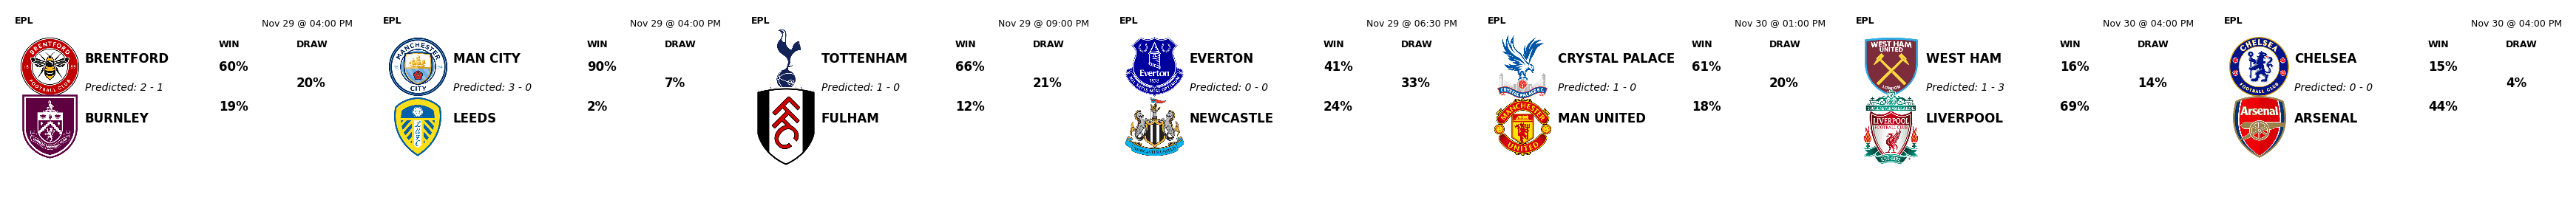

In [ ]:
matches = [
    {
        "league": "EPL",
        "kickoff": "Nov 29 @ 04:00 PM",
        "home_team": "Brentford",
        "away_team": "Burnley",
        "home_logo": "brentford.png",
        "away_logo": "burnley.png",
        "pred_score": "2 - 1",
        "home_win": 0.605,
        "draw": 0.20,
        "away_win": 0.19
    },
    {
        "league": "EPL",
        "kickoff": "Nov 29 @ 04:00 PM",
        "home_team": "Man City",
        "away_team": "Leeds",
        "home_logo": "man city.png",
        "away_logo": "leeds.png",
        "pred_score": "3 - 0",
        "home_win": 0.90,
        "draw": 0.072,
        "away_win": 0.025
    },
    {
        "league": "EPL",
        "kickoff": "Nov 29 @ 09:00 PM",
        "home_team": "Tottenham",
        "away_team": "Fulham",
        "home_logo": "spurs.png",
        "away_logo": "fulham.png",
        "pred_score": "1 - 0",
        "home_win": 0.66,
        "draw": 0.21,
        "away_win": 0.122
    },
    {
        "league": "EPL",
        "kickoff": "Nov 29 @ 06:30 PM",
        "home_team": "Everton",
        "away_team": "Newcastle",
        "home_logo": "everton.png",
        "away_logo": "newcastle.png",
        "pred_score": "0 - 0",
        "home_win": 0.41,
        "draw": 0.33,
        "away_win": 0.24
    },
    {
        "league": "EPL",
        "kickoff": "Nov 30 @ 01:00 PM",
        "home_team": "Crystal Palace",
        "away_team": "Man United",
        "home_logo": "crystal palace.png",
        "away_logo": "man utd.png",
        "pred_score": "1 - 0",
        "home_win": 0.61,
        "draw": 0.20,
        "away_win": 0.18
    },
    {
        "league": "EPL",
        "kickoff": "Nov 30 @ 04:00 PM",
        "home_team": "West Ham",
        "away_team": "Liverpool",
        "home_logo": "west ham.png",
        "away_logo": "liverpool.png",
        "pred_score": "1 - 3",
        "home_win": 0.155,
        "draw": 0.145,
        "away_win": 0.69
    },
    {
        "league": "EPL",
        "kickoff": "Nov 30 @ 04:00 PM",
        "home_team": "Chelsea",
        "away_team": "Arsenal",
        "home_logo": "chelsea.png",
        "away_logo": "arsenal.png",
        "pred_score": "0 - 0",
        "home_win": 0.15,
        "draw": 0.040,
        "away_win": 0.44
    }
]

plot_match_cards(matches)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np

def _load_logo(path, zoom=0.18):
    img = plt.imread(path)
    return OffsetImage(img, zoom=zoom)

def plot_match_cards(matches):
    n = len(matches)
    fig, axes = plt.subplots(n, 1, figsize=(6, 4*n))   # VERTICAL layout

    if n == 1:
        axes = [axes]

    for ax, m in zip(axes, matches):
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.axis("off")

        # Top text
        ax.text(0.02, 0.92, m["league"], fontsize=10, weight="bold")
        ax.text(0.98, 0.92, m["kickoff"], fontsize=10,
                ha="right", va="center")

        # Home logo
        home_logo = _load_logo(m["home_logo"], zoom=0.20)
        ab_home = AnnotationBbox(home_logo, (0.10, 0.65), frameon=False)
        ax.add_artist(ab_home)

        ax.text(0.20, 0.70, m["home_team"].upper(),
                fontsize=13, weight="bold", va="center")

        # Away logo
        away_logo = _load_logo(m["away_logo"], zoom=0.20)
        ab_away = AnnotationBbox(away_logo, (0.10, 0.35), frameon=False)
        ax.add_artist(ab_away)

        ax.text(0.20, 0.40, m["away_team"].upper(),
                fontsize=13, weight="bold", va="center")

        # Predicted score
        ax.text(0.20, 0.55, f"Predicted: {m['pred_score']}",
                fontsize=11, style="italic")

        # Labels
        ax.text(0.55, 0.80, "WIN", fontsize=10, weight="bold")
        ax.text(0.75, 0.80, "DRAW", fontsize=10, weight="bold")

        # Probabilities
        ax.text(0.55, 0.65, f"{int(round(m['home_win']*100))}%",
                fontsize=15, weight="bold")
        ax.text(0.55, 0.45, f"{int(round(m['away_win']*100))}%",
                fontsize=15, weight="bold")
        ax.text(0.75, 0.55, f"{int(round(m['draw']*100))}%",
                fontsize=15, weight="bold")

    plt.tight_layout()
    plt.show()



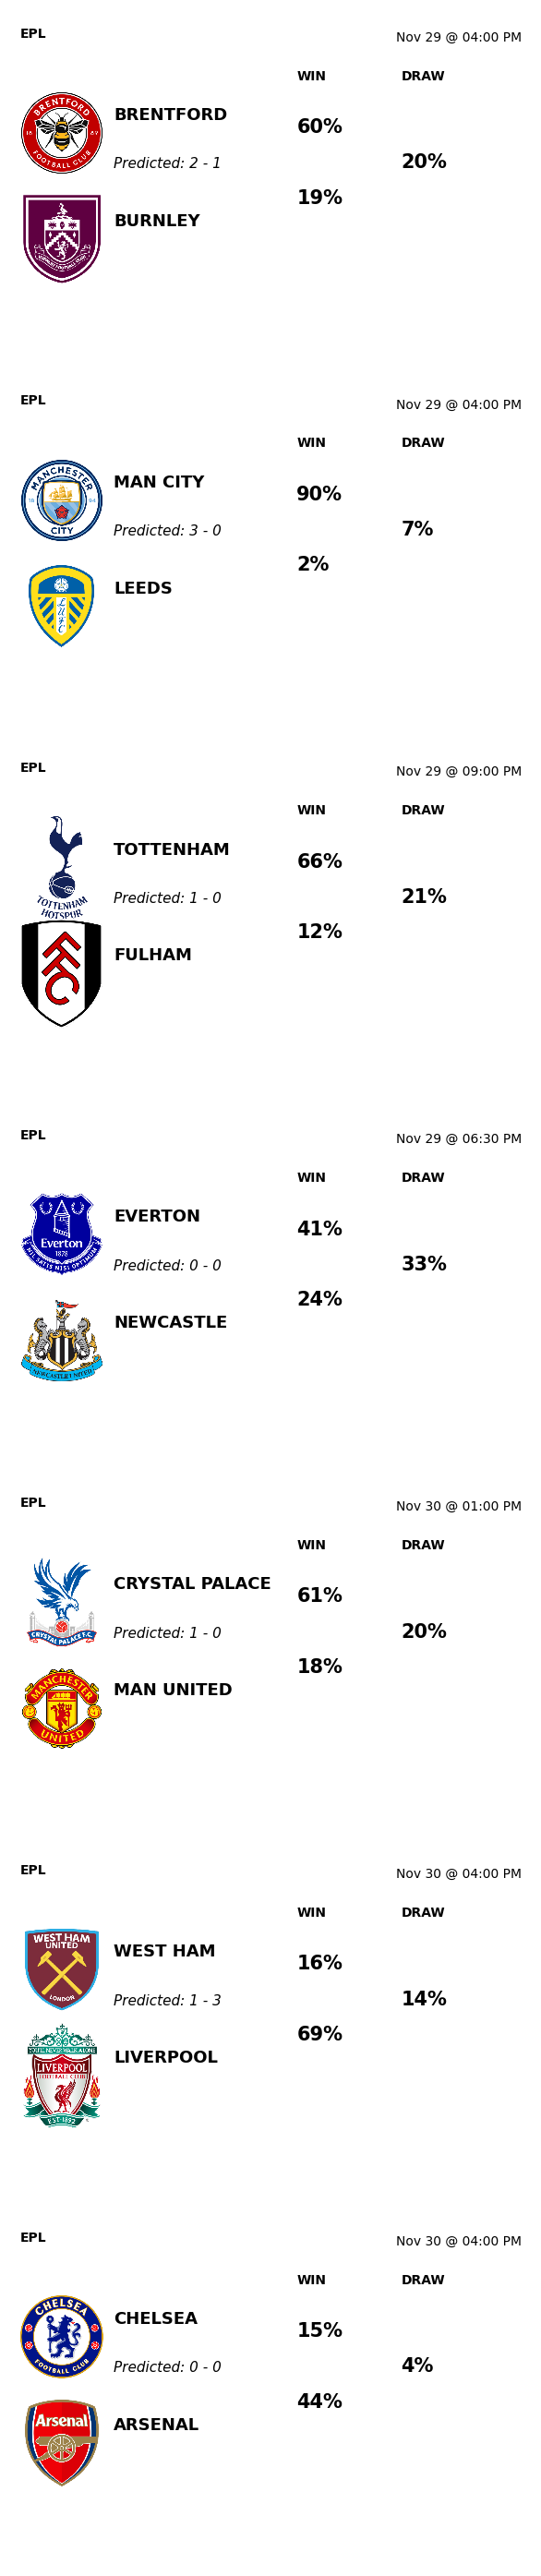

In [ ]:
matches = [
    {
        "league": "EPL",
        "kickoff": "Nov 29 @ 04:00 PM",
        "home_team": "Brentford",
        "away_team": "Burnley",
        "home_logo": "brentford.png",
        "away_logo": "burnley.png",
        "pred_score": "2 - 1",
        "home_win": 0.605,
        "draw": 0.20,
        "away_win": 0.19
    },
    {
        "league": "EPL",
        "kickoff": "Nov 29 @ 04:00 PM",
        "home_team": "Man City",
        "away_team": "Leeds",
        "home_logo": "man city.png",
        "away_logo": "leeds.png",
        "pred_score": "3 - 0",
        "home_win": 0.90,
        "draw": 0.072,
        "away_win": 0.025
    },
    {
        "league": "EPL",
        "kickoff": "Nov 29 @ 09:00 PM",
        "home_team": "Tottenham",
        "away_team": "Fulham",
        "home_logo": "spurs.png",
        "away_logo": "fulham.png",
        "pred_score": "1 - 0",
        "home_win": 0.66,
        "draw": 0.21,
        "away_win": 0.122
    },
    {
        "league": "EPL",
        "kickoff": "Nov 29 @ 06:30 PM",
        "home_team": "Everton",
        "away_team": "Newcastle",
        "home_logo": "everton.png",
        "away_logo": "newcastle.png",
        "pred_score": "0 - 0",
        "home_win": 0.41,
        "draw": 0.33,
        "away_win": 0.24
    },
    {
        "league": "EPL",
        "kickoff": "Nov 30 @ 01:00 PM",
        "home_team": "Crystal Palace",
        "away_team": "Man United",
        "home_logo": "crystal palace.png",
        "away_logo": "man utd.png",
        "pred_score": "1 - 0",
        "home_win": 0.61,
        "draw": 0.20,
        "away_win": 0.18
    },
    {
        "league": "EPL",
        "kickoff": "Nov 30 @ 04:00 PM",
        "home_team": "West Ham",
        "away_team": "Liverpool",
        "home_logo": "west ham.png",
        "away_logo": "liverpool.png",
        "pred_score": "1 - 3",
        "home_win": 0.155,
        "draw": 0.145,
        "away_win": 0.69
    },
    {
        "league": "EPL",
        "kickoff": "Nov 30 @ 04:00 PM",
        "home_team": "Chelsea",
        "away_team": "Arsenal",
        "home_logo": "chelsea.png",
        "away_logo": "arsenal.png",
        "pred_score": "0 - 0",
        "home_win": 0.15,
        "draw": 0.040,
        "away_win": 0.44
    }
]

plot_match_cards(matches)